<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Need)</span></div>

## 1 Random Numbers

### 1.1 Real and Pseudo Random Numbers

Typical PRNG produces uniformly distributed numbers between 0 and 1.

### 1.2 NumPy’s PRNG

In [1]:
np.random.rand()                # Give one number

0.5073759987418043

In [2]:
np.random.rand(10)              # Give ten numbers`

array([0.69296869, 0.34701103, 0.23958587, 0.44991924, 0.87294061,
       0.37425493, 0.80278272, 0.62635038, 0.6015082 , 0.41143483])

In [3]:
np.random.rand(5,2)             # Give five sets of 2

array([[0.60969917, 0.9015354 ],
       [0.90269882, 0.47381534],
       [0.35957838, 0.48870095],
       [0.27713738, 0.34519932],
       [0.92860773, 0.96866361]])

In [4]:
n = 10000
random_numbers = np.random.rand(n)

In [5]:
# The numbers less than .5 must be about 50%
np.sum(random_numbers < .5) / n * 100

50.13999999999999

In [6]:
# The numbers less than .25 must be about 25%
np.sum(random_numbers < .25) / n * 100

25.22

In [7]:
# The numbers more than .75 must be about 25%
np.sum(random_numbers > .75) / n * 100

25.35

### 1.3 A simple graphical test

In [10]:
from matplotlib import pyplot as plt

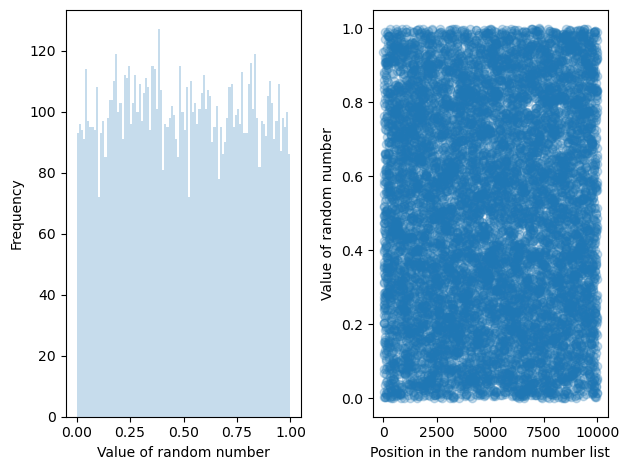

In [14]:
n = 10000
random_numbers = np.random.rand(n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")
plt.tight_layout()

### 1.4 Uniformly beyond \([0,1)\)

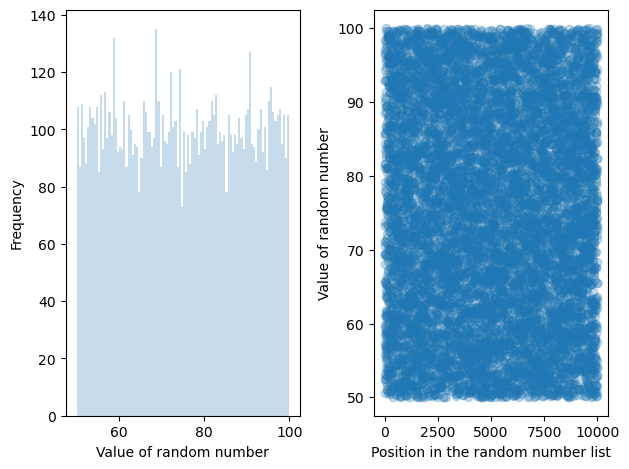

In [15]:
n = 10000
random_numbers = np.random.uniform(low=50, high=100, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")
plt.tight_layout()

### 1.5 ‘seeding’ a PRNG

In [16]:
np.random.randint(0, 100, 10)     # Ten integers between 0 and 100}

array([82, 43, 77, 91, 34, 12, 67, 71, 48, 66])

In [17]:
np.random.randint(0, 100, 10)     # Another ten integers between 0 and 100

array([37, 62, 53, 60, 26, 68, 20, 18, 57, 49])

In [18]:
np.random.seed(1234)              # Specifying a seed
np.random.randint(0, 100, 10)     # Ten integers between 0 and 100

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

In [19]:
np.random.seed(1234)
np.random.randint(0, 100, 10)     # Same ten integers between 0 and 100

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

## 2 Simulating a Magic-8 Ball

In [20]:
def shake_magic_8():
    '''
    Function to simulate a Magic-8 ball!
    '''
    options = ['It is certain.', 'It is decidedly so.',
               'Without a doubt.', 'Yes definitely.',
               'You may rely on it.', 'As I see it, yes.',
               'Most likely.', 'Outlook good.',
               'Yes.', 'Signs point to yes.',
               'Reply hazy, try again.', 'Ask again later.',
               'Better not tell you now.', 'Cannot predict now.',
               'Concentrate and ask again.', 'Don\'t count on it.',
               'My reply is no.', 'My sources say no.',
               'Outlook not so good.', 'Very doubtful.']

    return np.random.choice(options)

In [23]:
questions = ['Will I be pretty?',
             'Will I be rich?',
             'Will I be in trouble?']

for question in questions:
    print(f'Q: {question}')
    print(f'A: {shake_magic_8()}\n')

Q: Will I be pretty?
A: Don't count on it.

Q: Will I be rich?
A: Outlook not so good.

Q: Will I be in trouble?
A: My reply is no.



## 3 Flipping Coins

### 3.1 A fair coin

In [24]:
np.random.choice(['Head', 'Tails'])

'Tails'

In [25]:
no_of_coins = 10
np.random.choice(['Head', 'Tails'], no_of_coins)

array(['Head', 'Tails', 'Head', 'Head', 'Head', 'Tails', 'Tails', 'Tails',
       'Head', 'Tails'], dtype='<U5')

In [26]:
def flip_coins(no_of_coins=1, probability=.5):
    '''
    Returns the number of values greater that 
    `probability` (considered as 'Heads').
    '''
    results = np.random.rand(no_of_coins)
    no_of_heads = np.sum(results > probability)
    return no_of_heads

no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 51.40%


### 3.2 A biased coin

In [27]:
no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins, probability = .3)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 66.80%


### 3.3 A flipping experiment

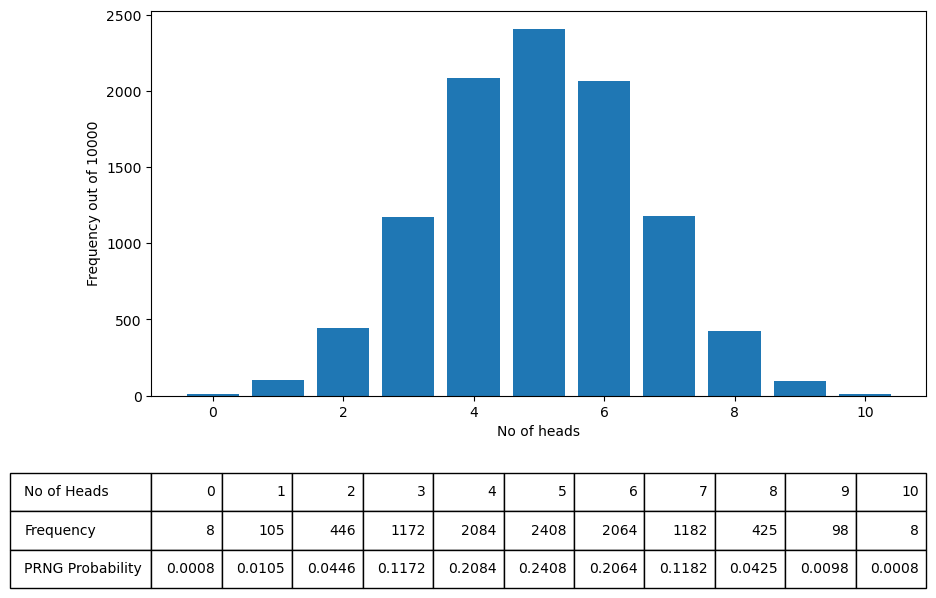

In [30]:
no_of_repeats = 10_000
result = [flip_coins(no_of_coins=10) for _ in range(no_of_repeats)]
no_of_heads, heads_counts = np.unique(result, return_counts=True)

heads_probability = heads_counts/no_of_repeats

plt.rcParams['figure.figsize'] = (10,5)
plt.bar(no_of_heads, heads_counts);
plt.xlabel('No of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_heads, heads_counts, heads_probability],
          rowLabels=['No of Heads', 'Frequency', 'PRNG Probability'],
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3])

In [32]:
pip install scipy

     ---------------------------------------- 42.5/42.5 MB 5.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [33]:
from scipy.stats import binom

In [34]:
binom.pmf(k=7, n=10, p=.5)

0.11718749999999996

In [35]:
binomial_probabilities = binom.pmf(k=no_of_heads, n=10, p=.5)

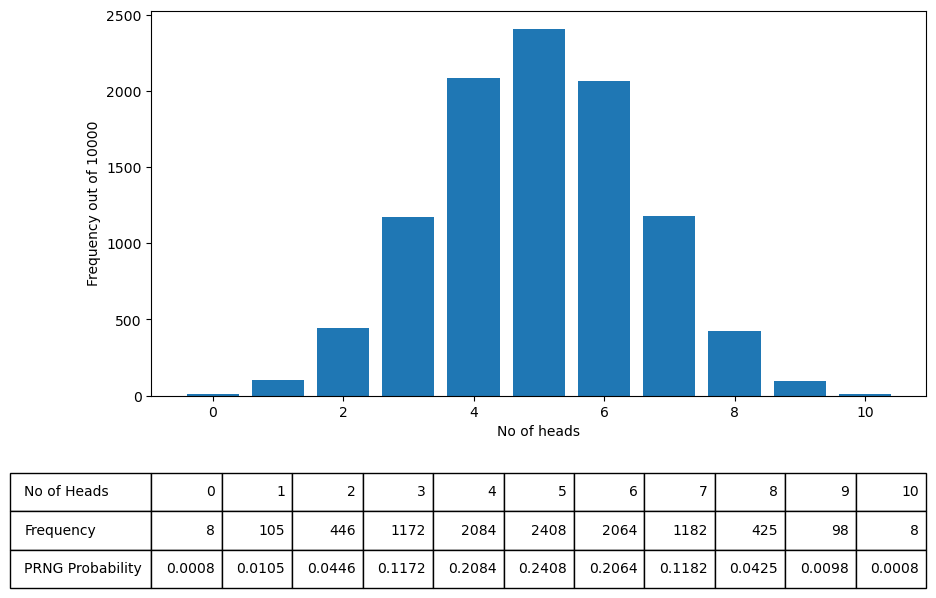

In [38]:
plt.rcParams['figure.figsize'] = (10,5)
plt.bar(no_of_heads, heads_counts);
plt.xlabel('No of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_heads, heads_counts, heads_probability],
          rowLabels=['No of Heads', 'Frequency', 'PRNG Probability'],
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3])

## Exercise 1 :  12C, 13C

**Q1**

In [130]:
def choose_C_isotope(no_of_C=1, probability = .9889):
    results = np.random.rand(no_of_C)
    no_of_C = np.sum(results > probability)
    return no_of_C

no_of_C = 27
no_of_C13 = choose_C_isotope(no_of_C)
print(f'Number of 13C: {no_of_C13}')

Number of 13C: 0


In [135]:
np.unique(result, return_counts=True)

(array([0, 1, 2, 3, 4]),
 array([74082, 22202,  3386,   316,    14], dtype=int64))

In [134]:
no_of_repeats = 10_0000
result = [choose_C_isotope(no_of_C=27) for _ in range(no_of_repeats)]
no_of_C13, C13_frequency = np.unique(result, return_counts=True)

In [137]:
result = np.array(result)
result.mean()

0.29978

In [138]:
result.std()

0.546142794148197

**Q2**

In [140]:
no_of_repeats = 10_0000
result = [choose_C_isotope(no_of_C=27) for _ in range(no_of_repeats)]
no_of_C13, C13_frequency = np.unique(result, return_counts=True)

C13_probability = C13_frequency/no_of_repeats


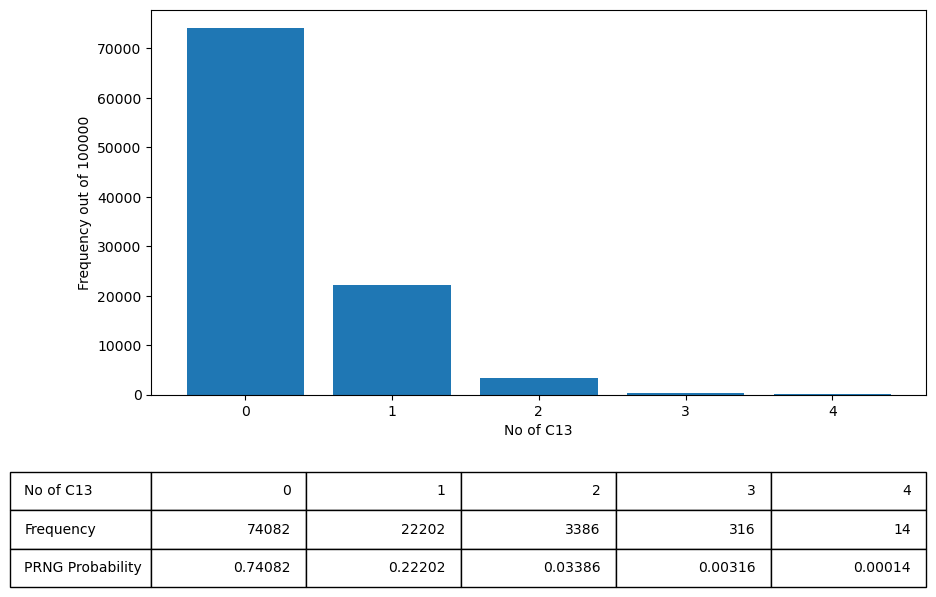

In [141]:
plt.rcParams['figure.figsize'] = (10,5)
plt.bar(no_of_C13, C13_frequency);
plt.xlabel('No of C13')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_C13, C13_frequency, C13_probability],
          rowLabels=['No of C13', 'Frequency', 'PRNG Probability'],
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3])

**Probability that a cholesterol molecule has no atoms of <sup>13</sup>C = 0.74082**